In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df=pd.read_csv('Train.csv')

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976



Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Handling Null Values

In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<Axes: >

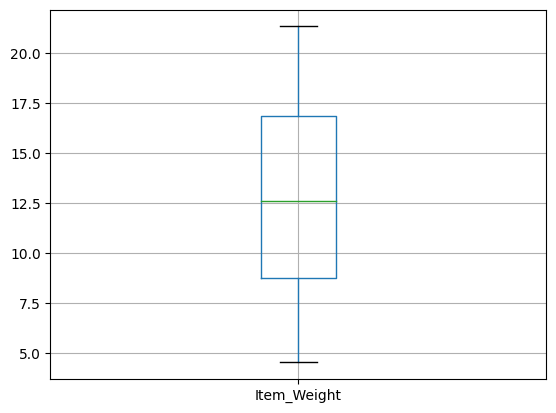

In [8]:
df.boxplot(column='Item_Weight')

 Item_Weight column has numerical values so we can replace null values with mean of the column.Therefore replacing null values with mean.

In [9]:
df["Item_Weight"].fillna(12.85,inplace=True)

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
df.duplicated()

0       False
1       False
2       False
4       False
5       False
        ...  
8517    False
8518    False
8520    False
8521    False
8522    False
Length: 6113, dtype: bool

In [13]:
df.duplicated().sum()

0

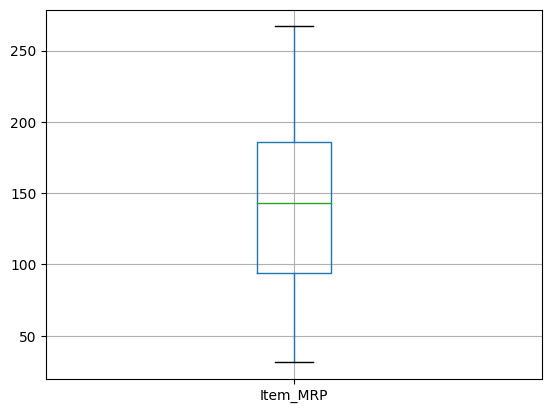

In [14]:
df.boxplot(column='Item_MRP')
plt.show()

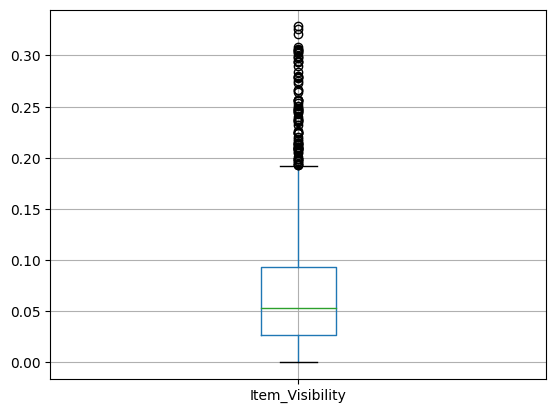

In [15]:
df.boxplot(column='Item_Visibility')
plt.show()


<Axes: >

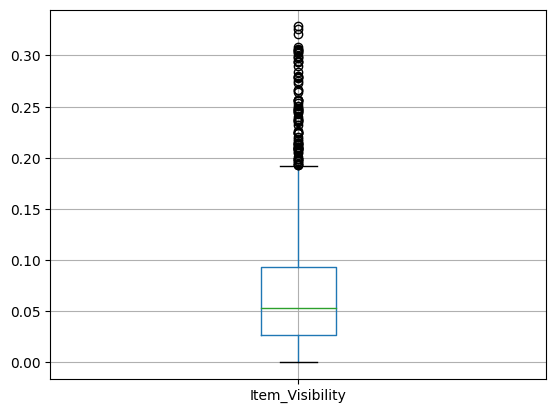

In [16]:
df.boxplot(column=["Item_Visibility"])

<Axes: >

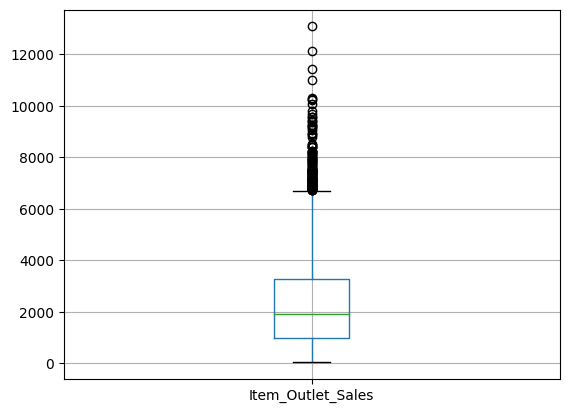

In [17]:
df.boxplot(column=["Item_Outlet_Sales"])

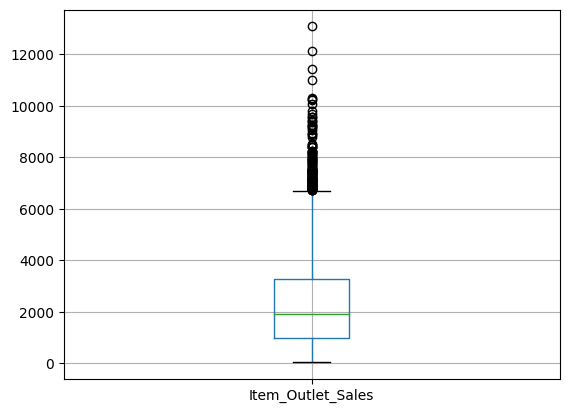

In [18]:
df.boxplot(column=["Item_Outlet_Sales"])
plt.show()

In [19]:
df.drop(columns=['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Size'],inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                6113 non-null   float64
 1   Item_Fat_Content           6113 non-null   object 
 2   Item_Visibility            6113 non-null   float64
 3   Item_MRP                   6113 non-null   float64
 4   Outlet_Establishment_Year  6113 non-null   int64  
 5   Outlet_Location_Type       6113 non-null   object 
 6   Outlet_Type                6113 non-null   object 
 7   Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 429.8+ KB


In [21]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

In [22]:
df["Item_Fat_Content"].head()


0    Low Fat
1    Regular
2    Low Fat
4    Low Fat
5    Regular
Name: Item_Fat_Content, dtype: object

In [23]:
pd.get_dummies(df["Item_Fat_Content"]).head()

,LF,Low Fat,Regular,low fat,reg
0,0,1,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
4,0,1,0,0,0
5,0,0,1,0,0


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Item_Fat_Content"]=le.fit_transform(df["Item_Fat_Content"])
df["Item_Fat_Content"]

0       1
1       2
2       1
4       1
5       2
       ..
8517    4
8518    1
8520    1
8521    2
8522    1
Name: Item_Fat_Content, Length: 6113, dtype: int64

In [25]:
df_num=df.select_dtypes(["int64","float64"])
df_cat=df.select_dtypes(["object"])

In [26]:
df.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.887026,1.368232,0.064505,141.256859,1995.794373,2322.688445
std,4.073813,0.644920,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,0.000000,31.290000,1985.000000,33.955800
25%,9.800000,1.000000,0.026681,94.012000,1987.000000,974.731200
50%,12.850000,1.000000,0.052811,143.178600,1997.000000,1928.156800
75%,15.700000,2.000000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,4.000000,0.328391,266.888400,2009.000000,13086.964800


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                6113 non-null   float64
 1   Item_Fat_Content           6113 non-null   int64  
 2   Item_Visibility            6113 non-null   float64
 3   Item_MRP                   6113 non-null   float64
 4   Outlet_Establishment_Year  6113 non-null   int64  
 5   Outlet_Location_Type       6113 non-null   object 
 6   Outlet_Type                6113 non-null   object 
 7   Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 429.8+ KB


In [28]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3',
       'Grocery Store'], dtype=object)

In [29]:
pd.get_dummies(df['Outlet_Location_Type']).head()


,Tier 1,Tier 2,Tier 3
0,1,0,0
1,0,0,1
2,1,0,0
4,0,0,1
5,0,0,1


In [30]:

df["Outlet_Location_Type"]=le.fit_transform(df["Outlet_Location_Type"])
df["Outlet_Location_Type"]

0       0
1       2
2       0
4       2
5       2
       ..
8517    0
8518    2
8520    1
8521    2
8522    0
Name: Outlet_Location_Type, Length: 6113, dtype: int64

In [31]:
df["Outlet_Type"]=le.fit_transform(df["Outlet_Type"])
df["Outlet_Type"]

0       1
1       2
2       1
4       1
5       2
       ..
8517    1
8518    1
8520    1
8521    2
8522    1
Name: Outlet_Type, Length: 6113, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                6113 non-null   float64
 1   Item_Fat_Content           6113 non-null   int64  
 2   Item_Visibility            6113 non-null   float64
 3   Item_MRP                   6113 non-null   float64
 4   Outlet_Establishment_Year  6113 non-null   int64  
 5   Outlet_Location_Type       6113 non-null   int64  
 6   Outlet_Type                6113 non-null   int64  
 7   Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 429.8 KB


In [33]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.026779,-0.008634,0.029225,-0.004230,0.003226,-0.002969,0.007966
Item_Fat_Content,-0.026779,1.000000,0.034027,-0.000066,-0.004422,-0.003003,-0.006880,0.004729
Item_Visibility,-0.008634,0.034027,1.000000,-0.000651,-0.087452,-0.103078,-0.144951,-0.105854
Item_MRP,0.029225,-0.000066,-0.000651,1.000000,0.011632,0.000321,-0.004840,0.588939
Outlet_Establishment_Year,-0.004230,-0.004422,-0.087452,0.011632,1.000000,-0.089391,-0.048919,-0.057850
Outlet_Location_Type,0.003226,-0.003003,-0.103078,0.000321,-0.089391,1.000000,0.670156,0.206719
Outlet_Type,-0.002969,-0.006880,-0.144951,-0.004840,-0.048919,0.670156,1.000000,0.368181
Item_Outlet_Sales,0.007966,0.004729,-0.105854,0.588939,-0.057850,0.206719,0.368181,1.000000


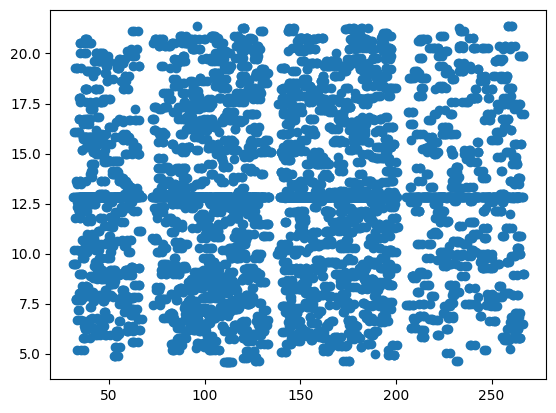

In [34]:
plt.scatter(df['Item_MRP'],df['Item_Weight'])
plt.show()

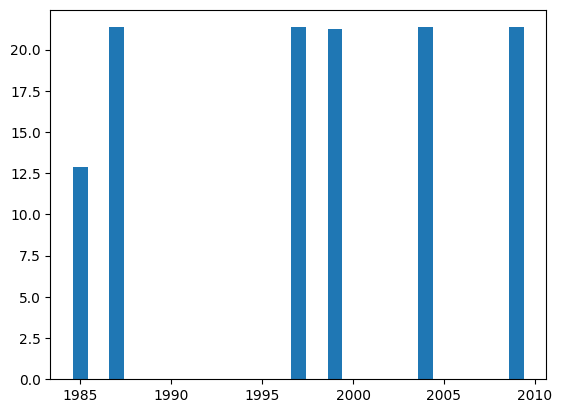

In [35]:
plt.bar(df['Outlet_Establishment_Year'],df['Item_Weight'])
plt.show()

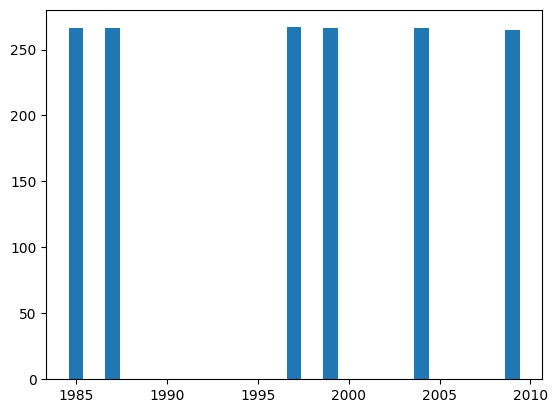

In [36]:
plt.bar(df['Outlet_Establishment_Year'],df['Item_MRP'])
plt.show()

In [37]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x



,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,9.300,1,0.016047,249.8092,1999,0,1
1,5.920,2,0.019278,48.2692,2009,2,2
2,17.500,1,0.016760,141.6180,1999,0,1
4,8.930,1,0.000000,53.8614,1987,2,1
5,10.395,2,0.000000,51.4008,2009,2,2
...,...,...,...,...,...,...,...
8517,20.750,4,0.083607,178.8318,1997,0,1
8518,6.865,1,0.056783,214.5218,1987,2,1
8520,10.600,1,0.035186,85.1224,2004,1,1
8521,7.210,2,0.145221,103.1332,2009,2,2


In [38]:
y

0       3735.1380
1        443.4228
2       2097.2700
4        994.7052
5        556.6088
          ...    
8517    3608.6360
8518    2778.3834
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 6113, dtype: float64

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [40]:
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [41]:
y_pred=lr.predict(x_train)
r2_score(y_train,y_pred)


0.4931107316621116

In [42]:
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.4950705801777495

In [43]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("MSE:",mse)


MSE: 1519249.7122328745


In [44]:
print("MAE:",mae)


MAE: 922.4476296566879


In [45]:
print("RMSE:",rmse)


RMSE: 1232.578481165753


In [46]:
print("R2:",r2)

R2: 0.4950705801777495


In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(x_train, y_train)

In [48]:
rf

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=18)

In [49]:
rf.score(x_train,y_train)

0.5568831854824698

In [50]:
prediction = rf.predict(x_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

1376644.9044941862
1173.3051199471458


In [51]:
from datetime import datetime
from sklearn.model_selection import GridSearchCV
## Define Grid
grid = {
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}
## show start time
print(datetime.now())
## Grid Search function
ok=GridSearchCV(estimator=RandomForestRegressor(),param_grid=grid, cv= 5)
ok.fit(x_train, y_train)
## show end time
print(datetime.now())

2023-08-07 11:26:47.850262
2023-08-07 11:30:17.746855


In [75]:
{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'random_state': 18}
# Create and train model
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
rf.fit(x_train, y_train)
# Predict on test data
prediction = rf.predict(x_test)
# Compute mean squared error
mse = mean_squared_error(y_test, prediction)
# Print results
print("MSE:%f"%(mse))
print("RMSE:%f"%(rmse))


MSE:1256329.734339
RMSE:1126.387895


This mean squared error result is lower than our base model which is great to see but overall, I’d still consider this performance inadequate

In [60]:
import xgboost as xg

In [61]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [66]:
pred = xgb_r.predict(x_test)

In [64]:
xgb_r.fit(x_train, y_train)

[11:36:06] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [77]:
xgb_r.score(x_train,y_train)

0.6585388567700805

In [76]:
mse = mean_squared_error(y_test, pred)
rmse =mse**.5
print("MSE : % f" %(mse))
print("RMSE : % f" %(rmse))

MSE :  1268749.689400
RMSE :  1126.387895


#**CONCLUSION**

In this Task, I Cleaned the data then Performed EDA on it.After performing EDA,splited Data in Train and test then applied 3 algorithms linear regression,random forest and xgboost.
The values of r2 score,Mean Squared error,Mean absolute error,Root mean squared error for linear regression are  0.4950705801777495,1519249.7122328745,922.4476296566879,1232.578481165753 respectivly.Similarly for Random Forest values of r2 score,Mean Squared error,Root mean squared error are 0.6196312083963971,1256329.734339,1126.387895.
In Random Forest Algorithm mean squared error and root mean squared error results is lower than our base model which is great to see but overall  I’d still consider this performance inadequate.
For xgboost the Root Mean Squares error is 1126.387895,Mean Squared error is  1268749.689400 and r2 score is 0.6585388567700805.
